In [57]:
class Operation():

    def __init__(self, input_nodes = []):
        self.input_nodes = input_nodes
        self.output_nodes = []
        for node in input_nodes:
            node.output_nodes.append(self)
        _default_graph.operations.append(self)
  
    def compute(self):
        pass

In [58]:
class add(Operation):
    
    def __init__(self, x, y):
        super().__init__([x, y])

    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [59]:
class multiply(Operation):
     
    def __init__(self, a, b):
        super().__init__([a, b])
    
    def compute(self, a_var, b_var):      
        self.inputs = [a_var, b_var]
        return a_var * b_var

In [60]:
class matmul(Operation):
     
    def __init__(self, a, b):
        super().__init__([a, b])
    
    def compute(self, a_mat, b_mat):
        self.inputs = [a_mat, b_mat]
        return a_mat.dot(b_mat)

In [61]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes = []
        _default_graph.placeholders.append(self)

In [62]:
class Variable():

    def __init__(self, initial_value = None):
        self.value = initial_value
        self.output_nodes = []
        _default_graph.variables.append(self)

In [63]:
class Graph():
    
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

In [64]:
import numpy as np

In [65]:
def traverse_postorder(operation):
    nodes_postorder = []
    
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [66]:
class Session():
    
    def run(self, operation, feed_dict = {}):

        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:     
                node.output = feed_dict[node]         
            elif type(node) == Variable:
                node.output = node.value
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        return operation.output

In [67]:
g = Graph();
g.set_as_default()
A = Variable(10)
b = Variable(1)
x = Placeholder()
y = multiply(A,x)
z = add(y,b)
sess = Session()
result = sess.run(operation=z,feed_dict={x:10})
result

101

In [68]:
g = Graph()
g.set_as_default()
A = Variable([[10,20],[30,40]])
b = Variable([1,1])
x = Placeholder()
y = matmul(A,x)
z = add(y,b)
sess = Session()
result = sess.run(operation=z,feed_dict={x:10})
result

array([[101, 201],
       [301, 401]])

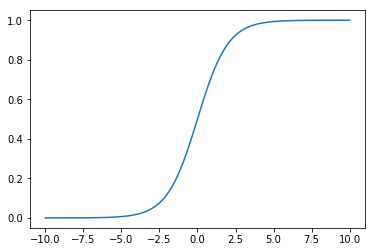

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
def sigmoid(z):
    return 1/(1+np.exp(-z))
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)
plt.plot(sample_z,sample_a)

In [70]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        super().__init__([z])

    def compute(self, z_val):
        return 1/(1+np.exp(-z_val))

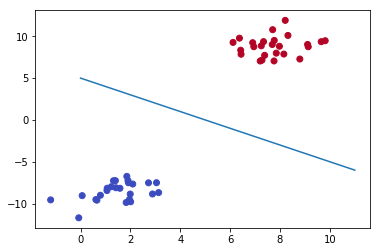

In [71]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples = 50,n_features=2,centers=2,random_state=75)
features = data[0]
#### plt.scatter(features[:,0],features[:,1])
labels = data[1]
#### plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')
x = np.linspace(0,11,10)
y = -x + 5
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')
plt.plot(x,y)

In [72]:
np.array([1, 1]).dot(np.array([[8],[10]])) - 5

array([13])

In [73]:
np.array([1,1]).dot(np.array([[4],[-10]])) - 5

array([-11])

In [74]:
g = Graph()
g.set_as_default()
x = Placeholder()
w = Variable([1,1])
b = Variable(-5)
z = add(matmul(w,x),b)
a = Sigmoid(z)
sess = Session()

In [75]:
sess.run(operation=a,feed_dict={x:[8,10]})

0.999997739675702

In [76]:
sess.run(operation=a,feed_dict={x:[0,-10]})

3.059022269256247e-07